# Ribociclib CCLE GDSC2

This notebook investigates the effect of ribociclib on cell lines from the Cancer Cell Line Encyclopedia (CCLE) and the Genomics of Drug Sensitivity in Cancer (GDSC2) datasets.

## Run 1 - Naive Feature Selection 

In [24]:
## LOADING DATA

import pickle

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)

In [25]:
import dynmarker.FeatureSelection as fs 

In [26]:
feature_data, label_data = fs.create_feature_and_label(ribociclib_data)

In [12]:
feature_data.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
SANGER_MODEL_ID,,,,,,,,,,,,,,,,,,,,,
SIDM00872,5.296090,0.000000,6.794416,3.452859,5.260778,0.042644,4.339137,5.833143,7.313246,4.764474,...,1.827819,0.000000,0.847997,1.704872,0.411426,0.000000,1.063503,0.000000,0.000000,0.000000
SIDM00866,5.214125,0.000000,6.328047,3.168321,4.654206,0.042644,0.432959,6.574102,5.140779,5.114783,...,0.000000,0.000000,0.298658,1.584963,0.695994,0.000000,2.693766,0.000000,0.000000,0.000000
SIDM00885,5.241840,0.201634,5.615299,3.090853,3.732269,0.084064,0.111031,4.026800,5.471513,6.019480,...,0.632268,0.000000,0.422233,1.250962,0.505891,0.111031,0.070389,0.000000,0.111031,0.000000
SIDM00884,3.481557,0.000000,7.070389,2.341986,3.679199,0.176323,3.420887,5.854494,5.976134,5.112283,...,2.327687,0.226509,0.650765,2.477677,0.000000,0.000000,0.042644,0.000000,0.084064,0.000000
SIDM00877,4.349082,0.000000,6.479942,2.790772,4.031219,0.070389,0.070389,4.682011,5.632850,4.441616,...,0.400538,0.084064,0.150560,1.823749,0.163499,0.042644,0.097611,0.084064,0.042644,0.475085


In [13]:
label_data.head()

SANGER_MODEL_ID
SIDM00872    4.254618
SIDM00866    3.583018
SIDM00885    4.023289
SIDM00884    3.146215
SIDM00877    6.135124
Name: LN_IC50, dtype: float64

In [14]:
feature_data.shape

(44, 19221)

In [15]:
label_data.shape

(44,)

In [16]:
naive_scores = fs.naive_test_regression(feature_data, label_data, cv=5, verbose=1)

------ Naive test - Linear Regression
Linear Regression score: 1.0558, std: 0.3175


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

scaler = Normalizer()
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), LinearSVR(max_iter=100000), KNeighborsRegressor(), RandomForestRegressor(), MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=20000, alpha=1)]

for model in models:
    pipe = Pipeline([('scaler', scaler), ('regressor', model)])
    scores = cross_val_score(pipe, mrmr_feature_selected_data, label_data, cv=5, scoring='neg_mean_squared_error')
    print(f'------------ {model.__class__.__name__}')
    print(f'NORM mean: {-scores.mean():.4f}, std: {scores.std():.4f}')

    scores = cross_val_score(model, mrmr_feature_selected_data, label_data, cv=5, scoring='neg_mean_squared_error')
    print(f'NONE mean: {-scores.mean():.4f}, std: {scores.std():.4f}')

In [ ]:
# import f_regression from sklearn.feature_selection
from sklearn.feature_selection import f_regression

selected_feature_scores, support = fs.filter_feature_selection(feature_data, label_data, method=f_regression, K=100)

(44, 100)


In [ ]:
support

array([   25,    59,   307,   492,  1118,  1273,  1368,  1469,  1789,
        1840,  1926,  2650,  2806,  2862,  2868,  3720,  4275,  4557,
        4817,  5339,  5463,  5642,  5827,  6043,  6183,  6290,  6561,
        6625,  6629,  7350,  8108,  8182,  8424,  8593,  8850,  8949,
        9171,  9735,  9767, 10040, 10070, 10439, 10604, 10627, 10752,
       11086, 11092, 11230, 11308, 11436, 11563, 12068, 12147, 12361,
       12449, 12538, 12541, 12543, 12546, 12584, 12610, 12623, 12650,
       12753, 12833, 12917, 13001, 13696, 13848, 13882, 13971, 14604,
       14748, 15190, 15484, 15615, 15709, 15758, 15788, 16305, 16653,
       16674, 16720, 16745, 16792, 16881, 17726, 17773, 17831, 17987,
       18139, 18241, 18269, 18443, 18564, 18835, 18955, 19096, 19146,
       19198], dtype=int64)

In [ ]:
selected_feature_scores

array([10.82627678, 15.92844663, 13.71697482,  9.95307355, 12.13242575,
       10.02079788, 19.75970755, 11.90586857, 11.22664203, 12.33704868,
        9.48603855,  9.8415579 , 10.81133646,  9.37640248,  9.6787931 ,
       24.05328882,  9.2083788 , 11.9992517 ,  9.78245435,  9.59244357,
        9.715793  , 11.30495425, 11.00389816,  9.71452309, 22.02057141,
       10.677195  , 10.03519764, 12.70750482, 11.35548111,  9.64648155,
       12.34158029, 23.2071735 ,  9.75107191,  9.45111478,  9.60400579,
       12.41447586,  9.31145859,  9.5312938 ,  9.76527142, 10.89872446,
        9.64590581,  9.20248742, 13.75909631, 13.24306591, 14.72834766,
        9.93772295, 14.84494037, 15.14213456, 14.11271046, 10.93071752,
       14.98189937, 10.50886893, 11.23182619, 11.72389423,  9.75146395,
        9.49045437,  9.23285322, 13.58738927,  9.48121941,  9.28324863,
        9.31968651, 10.02964415,  9.21877019, 10.40267397,  9.54049067,
        9.97512081, 11.32237901,  9.43377427, 16.91962829, 13.16

In [ ]:
selected_feature_data = feature_data.iloc[:, support]
selected_feature_data.head()

,WNT16,PDK4,GABRA3,ALG1,CHAT,TXK,PAK3,MOXD1,TESC,ARHGAP4,SLC17A6,BEX4,NOMO1,ZDHHC2,FZD3,FOLR3,HEMK1,MFN2,FGF23,PLP1,PSG8,PAX1,RAB3IP,MPDU1,CACNG6,AKAP12,ZSWIM3,BEX2,BEX1,VARS2,CACNG8,SYPL2,ZNF385B,SHISAL2B,GOLGA7,IDI2,SPATA4,OTOA,MICU3,GPRASP2,...,SLC26A5,OR10A3,PSG6,NPTX1,CLSTN1,FOXB1,CSDC2,ZNF135,OR2T33,OR2T8,DPY19L2,NLRP10,SLC8A1,NOMO2,RGS7BP,VSTM2B,SLC18A3,CLEC17A,TMEM221,ZFP28,ZNF334,PEG3,CNGA1,ZNF536,LRRTM3,BHLHB9,IFI30,PSG7,C1GALT1C1L,PSG1,OR2W3,PSG2,PSG11,ZNF345,MTRNR2L10,ZIM2,TBC1D3I,OR10A6,CSNKA2IP,AC113348.1
SANGER_MODEL_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SIDM00872,0.275007,0.333424,1.510962,4.617063,0.014355,1.000000,0.028569,0.226509,0.704872,2.039138,0.042644,3.148934,6.175325,0.475085,1.963474,0.070389,3.795975,6.910133,0.028569,0.124328,0.028569,0.000000,3.894333,6.197512,0.097611,1.286881,1.448901,2.853996,1.097611,4.313246,0.084064,0.028569,0.604071,0.0,6.804647,0.000000,0.084064,0.000000,0.056584,2.378512,...,0.014355,0.042644,0.070389,0.238787,6.876885,0.014355,0.014355,0.042644,0.000000,0.000000,0.084064,0.000000,0.594549,6.967745,0.150560,0.028569,0.000000,0.028569,0.084064,0.687061,0.056584,0.739848,2.295723,0.014355,0.0,0.464668,7.368856,0.0,0.000000,0.275007,0.000000,0.000000,0.084064,2.032101,0.0,0.070389,0.238787,0.084064,0.0,0.000000
SIDM00866,0.411426,0.238787,0.028569,5.426265,0.000000,1.292782,0.042644,0.748461,0.176323,2.901108,0.014355,1.201634,6.420550,2.680324,1.275007,0.000000,3.144046,5.848247,0.000000,0.201634,0.400538,0.000000,5.260026,6.120186,0.028569,2.253989,2.114367,2.435629,0.176323,4.948601,0.000000,0.014355,0.238787,0.0,5.185470,0.000000,0.056584,0.042644,1.035624,1.356144,...,0.000000,0.028569,0.070389,0.176323,7.032542,0.070389,0.201634,1.144046,0.000000,0.000000,1.280956,0.948601,0.042644,7.572890,0.333424,0.000000,0.000000,0.014355,0.443607,1.490570,0.014355,0.028569,0.176323,0.014355,0.0,0.985500,7.917551,0.0,0.028569,0.137504,0.000000,0.000000,0.000000,1.130931,0.0,0.000000,0.454176,0.014355,0.0,0.000000
SIDM00885,0.056584,2.424922,0.150560,3.653060,0.042644,0.124328,0.298658,0.863938,0.263034,2.636915,0.000000,4.539779,5.755422,0.124328,2.313246,0.176323,2.526069,6.073820,0.000000,0.214125,0.000000,0.000000,4.421560,5.165108,0.014355,2.063503,2.014355,4.648465,1.189034,4.775577,0.000000,0.028569,0.495695,0.0,5.453518,0.028569,0.028569,0.056584,0.765535,2.763412,...,0.084064,0.014355,0.000000,0.124328,5.261907,0.028569,0.613532,3.618239,0.000000,0.000000,0.641546,0.298658,0.176323,6.456970,0.263034,0.000000,0.014355,0.000000,0.028569,2.666757,1.636915,0.214125,0.226509,0.000000,0.0,2.042644,6.684959,0.0,0.454176,0.263034,0.000000,0.000000,0.000000,2.875780,0.0,0.000000,0.622930,0.014355,0.0,0.137504
SIDM00884,0.124328,0.070389,0.028569,4.750070,0.014355,0.028569,0.028569,1.056584,0.214125,1.608809,0.000000,1.769772,7.599392,2.594549,0.948601,0.250962,3.960697,6.747924,0.000000,0.137504,0.000000,0.000000,1.232661,6.006747,0.014355,0.887525,2.097611,3.878725,0.731183,4.878235,0.084064,0.111031,0.097611,0.0,4.728465,0.000000,0.000000,0.014355,0.970854,0.985500,...,0.000000,0.000000,0.000000,1.014355,6.410070,0.000000,0.475085,2.198494,0.000000,0.000000,0.226509,0.111031,1.028569,8.238214,0.000000,0.000000,0.014355,0.000000,0.189034,1.739848,0.111031,3.249445,0.056584,0.000000,0.0,0.097611,7.061560,0.0,0.422233,0.137504,0.124328,0.042644,0.000000,1.536053,0.0,0.400538,0.084064,0.000000,0.0,0.000000
SIDM00877,0.070389,0.111031,0.000000,2.702658,0.000000,0.475085,0.555816,0.516015,0.201634,2.347666,0.000000,2.829850,4.338424,2.432959,1.974529,0.432959,3.109361,5.269407,0.014355,0.150560,0.000000,0.389567,5.313609,3.806324,0.014355,0.687061,0.739848,6.407353,0.933573,3.925050,0.070389,0.632268,0.378512,0.0,6.438459,0.028569,0.014355,0.028569,1.570463,1.438293,...,0.028569,0.000000,0.000000,0.097611,3.725741,0.056584,0.238787,1.981853,0.275007,0.124328,2.397803,0.000000,1.485427,4.815575,0.000000,0.056584,0.000000,0.014355,0.042644,2.

In [ ]:
f_regression_filter_scores = fs.naive_test_regression(selected_feature_data, label_data, cv=5)

In [ ]:
### MRMR Feature Selection

from dynmarker.FeatureSelection import mrmr_select_fcq

mrmr_feature_selected, successive_scores = mrmr_select_fcq(feature_data, label_data, K=50, verbose=1)

Iteration 1 selected FOLR3 score 2405328.882360086 remaining 19220 features
Iteration 2 selected KIAA1841 score 56175.64972741656 remaining 19219 features
Iteration 3 selected COX6A2 score 929.9799119433212 remaining 19218 features
Iteration 4 selected PGA5 score 243.06331156021403 remaining 19217 features
Iteration 5 selected L3MBTL2 score 245.8932639037736 remaining 19216 features
Iteration 6 selected PAK3 score 150.1157165100612 remaining 19215 features
Iteration 7 selected OR2T33 score 101.45558493617858 remaining 19214 features
Iteration 8 selected SYPL2 score 85.52732482067111 remaining 19213 features
Iteration 9 selected CACNG6 score 73.9764396367321 remaining 19212 features
Iteration 10 selected TBC1D3I score 74.62674289019189 remaining 19211 features
Iteration 11 selected SLC8A1 score 63.80905537603905 remaining 19210 features
Iteration 12 selected UVRAG score 63.31609411855542 remaining 19209 features
Iteration 13 selected PDK4 score 62.796959241539774 remaining 19208 feature

In [ ]:
mrmr_feature_selected_data = feature_data.iloc[:, mrmr_feature_selected]
mrmr_feature_selected_data.head()

,FOLR3,KIAA1841,COX6A2,PGA5,L3MBTL2,PAK3,OR2T33,SYPL2,CACNG6,TBC1D3I,SLC8A1,UVRAG,PDK4,TMED10,CSNKA2IP,LRRTM3,CNGA1,VSTM2B,RNF180,CLEC17A,B3GNT2,C8orf48,NOMO1,GABRA3,NTNG1,PAX1,BHLHB9,BEX2,MTRNR2L10,MFN2,NOS1AP,TRIM58,ZSWIM3,TESC,AVPR1A,PPP1R9A,MPDU1,HEMK1,ZIM2,GYG2,SMCP,ALG5,ARHGAP4,TSPAN6,AC113348.1,FGF23,CACNG8,MOXD1,PRKACG,HCRT
SANGER_MODEL_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SIDM00872,0.070389,3.447579,0.000000,0.000000,3.879706,0.028569,0.000000,0.028569,0.097611,0.238787,0.594549,3.821710,0.333424,8.458735,0.0,0.0,2.295723,0.028569,0.028569,0.028569,4.531069,0.000000,6.175325,1.510962,0.070389,0.000000,0.464668,2.853996,0.0,6.910133,0.941106,0.042644,1.448901,0.704872,0.000000,1.157044,6.197512,3.795975,0.070389,4.017922,0.0,5.198494,2.039138,5.296090,0.000000,0.028569,0.084064,0.226509,0.000000,0.0
SIDM00866,0.000000,3.692650,0.000000,0.000000,5.111031,0.042644,0.000000,0.014355,0.028569,0.454176,0.042644,3.845992,0.238787,7.915222,0.0,0.0,0.176323,0.000000,0.545968,0.014355,4.455492,1.150560,6.420550,0.028569,0.137504,0.000000,0.985500,2.435629,0.0,5.848247,1.713696,0.000000,2.114367,0.176323,0.000000,1.604071,6.120186,3.144046,0.000000,0.028569,0.0,4.773469,2.901108,5.214125,0.000000,0.000000,0.000000,0.748461,0.000000,0.0
SIDM00885,0.176323,3.430285,0.000000,0.070389,3.785551,0.298658,0.000000,0.028569,0.014355,0.622930,0.176323,3.397803,2.424922,7.366147,0.0,0.0,0.226509,0.000000,1.627607,0.000000,3.552131,0.000000,5.755422,0.150560,0.042644,0.000000,2.042644,4.648465,0.0,6.073820,2.575312,0.028569,2.014355,0.263034,0.056584,2.140779,5.165108,2.526069,0.000000,1.042644,0.0,5.092123,2.636915,5.241840,0.137504,0.000000,0.000000,0.863938,0.014355,0.0
SIDM00884,0.250962,3.234195,0.378512,0.238787,4.765535,0.028569,0.000000,0.111031,0.014355,0.084064,1.028569,3.192194,0.070389,8.261578,0.0,0.0,0.056584,0.000000,0.137504,0.000000,3.351911,0.731183,7.599392,0.028569,0.150560,0.000000,0.097611,3.878725,0.0,6.747924,1.028569,0.298658,2.097611,0.214125,0.000000,0.056584,6.006747,3.960697,0.400538,0.286881,0.0,4.984589,1.608809,3.481557,0.000000,0.000000,0.084064,1.056584,0.000000,0.0
SIDM00877,0.432959,4.364572,0.000000,0.042644,3.621759,0.555816,0.275007,0.632268,0.014355,1.163499,1.485427,3.166715,0.111031,5.751142,0.0,0.0,2.575312,0.056584,0.790772,0.014355,5.272023,0.000000,4.338424,0.000000,0.594549,0.389567,2.204767,6.407353,0.0,5.269407,2.056584,2.347666,0.739848,0.201634,0.226509,2.247928,3.806324,3.109361,1.130931,0.286881,0.0,4.411426,2.347666,4.349082,0.226509,0.014355,0.070389,0.516015,0.014355,0.0


In [ ]:
mrmr_scores = fs.naive_test_regression(mrmr_feature_selected_data, label_data, cv=5)

c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
## Does normalisation help?

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

scaler = Normalizer()
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), LinearSVR(max_iter=100000), KNeighborsRegressor(), RandomForestRegressor(), MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=20000, alpha=1)]

for model in models:
    pipe = Pipeline([('scaler', scaler), ('regressor', model)])
    scores = cross_val_score(pipe, mrmr_feature_selected_data, label_data, cv=5, scoring='neg_mean_squared_error')
    print(f'------------ {model.__class__.__name__}')
    print(f'NORM mean: {-scores.mean():.4f}, std: {scores.std():.4f}')

    scores = cross_val_score(model, mrmr_feature_selected_data, label_data, cv=5, scoring='neg_mean_squared_error')
    print(f'NONE mean: {-scores.mean():.4f}, std: {scores.std():.4f}')




------------ LinearRegression
NORM mean: 1.9162, std: 1.1885
NONE mean: 1.8649, std: 1.0800
------------ Ridge
NORM mean: 0.5671, std: 0.1698
NONE mean: 0.3456, std: 0.1518
------------ Lasso
NORM mean: 1.0552, std: 0.2627
NONE mean: 1.0552, std: 0.2627
------------ ElasticNet
NORM mean: 1.0552, std: 0.2627
NONE mean: 0.9474, std: 0.2491
------------ LinearSVR
NORM mean: 0.6393, std: 0.2244
NONE mean: 0.8301, std: 0.3932
------------ KNeighborsRegressor
NORM mean: 0.6364, std: 0.2343
NONE mean: 0.6428, std: 0.2172
------------ RandomForestRegressor
NORM mean: 0.4921, std: 0.1574
NONE mean: 0.5247, std: 0.1058
------------ MLPRegressor
NORM mean: 0.4669, std: 0.5075
NONE mean: 0.2959, std: 0.0891


In [ ]:
## Feature Selection with GFFS 

from dynmarker.FeatureSelection import greedy_forward_select_evaluate
from sklearn.model_selection import KFold

mrmr_scores = list(zip(successive_scores, mrmr_feature_selected))
outer_cv = KFold(n_splits=5, shuffle=True)
inner_cv = KFold(n_splits=5, shuffle=True)

gffs_feature_selected, final_scores = greedy_forward_select_evaluate(feature_data, label_data, K=20, model=KNeighborsRegressor(), ranked_features=mrmr_scores, scoring_method='neg_mean_squared_error',outer_cv=outer_cv, inner_cv=inner_cv, verbose=1) 

------------ Outer CV: 1
Feature Selected: 5033, Score: -0.5987792584321773, Feature Size: 2
Feature Selected: 8182, Score: -0.443185124156089, Feature Size: 3
Feature Selected: 12541, Score: -0.4115585563988402, Feature Size: 4
Feature Selected: 18835, Score: -0.440999792350728, Feature Size: 5
Feature Selected: 5642, Score: -0.48105902252864235, Feature Size: 6
Feature Selected: 8108, Score: -0.44400933895872574, Feature Size: 7
Feature Selected: 11308, Score: -0.39472315449514284, Feature Size: 8
Feature Selected: 19146, Score: -0.4306259343529269, Feature Size: 9
Feature Selected: 4817, Score: -0.4463934815565681, Feature Size: 10
Feature Selected: 16792, Score: -0.4037860811144013, Feature Size: 11
Feature Selected: 15615, Score: -0.4114486624867201, Feature Size: 12
Feature Selected: 13848, Score: -0.4061925723093463, Feature Size: 13
Feature Selected: 18564, Score: -0.417532421832688, Feature Size: 14
Feature Selected: 10752, Score: -0.4195528996023613, Feature Size: 15
Feature 

## Run 2 - Feature Selection Using Pipeline

In [10]:
## LOADING DATA

import pickle
import dynmarker.FeatureSelection as fs 

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)

feature_data, label_data = fs.create_feature_and_label(ribociclib_data)


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.feature_selection import f_regression, SelectKBest
# from sklearn import set_config
# set_config(transform_output = "pandas")

import pandas as pd 

from functools import partial

scaler = Normalizer()
feature_selector = SelectKBest(score_func=f_regression, k=20)
model = ElasticNet()

scores, pval = f_regression(feature_data, label_data)
scores # score for each feature at their respective index

K = 20
mrmr_score_func = partial(fs.mrmr_select_fcq_sklearn, K=K)
mrmr_selector = SelectKBest(mrmr_score_func, k=K)


# scaler.fit(feature_data)

# feature_data = scaler.transform(feature_data)
# feature_data

pipe = Pipeline([('feature_selector', mrmr_selector), ('regressor', model)])

scores = cross_val_score(pipe, feature_data, label_data, cv=5, scoring='neg_mean_squared_error')

print(f'NORM mean: {-scores.mean():.4f}, std: {scores.std():.4f}')

NORM mean: 1.1379, std: 0.3477


In [15]:
pipe = Pipeline([('feature_selector', feature_selector), ('regressor', model)])

scores = cross_val_score(pipe, feature_data, label_data, cv=5, scoring='neg_mean_squared_error')

print(f'NORM mean: {-scores.mean():.4f}, std: {scores.std():.4f}')

NORM mean: 1.1303, std: 0.3503


## Run 3 - Random Feature Selection

Without using sci-kit learn's pipeline for now, given compatability issues with pandas dataframe and column name tracebacks. 

In [27]:
## LOADING DATA

import pickle
import dynmarker.FeatureSelection as fs 

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)

feature_data, label_data = fs.create_feature_and_label(ribociclib_data)

In [28]:
y_std = label_data.std()
y_std

1.0169617839067444

In [29]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [5]:
# create a Kfold object and test for cross-validation

outer_cv = KFold(n_splits=5, shuffle=True)

feature_selected_per_fold = []
for i, (train_index, test_index) in enumerate(outer_cv.split(feature_data, label_data)):
    X_train, X_test = feature_data.iloc[train_index,:], feature_data.iloc[test_index,:]
    y_train, y_test = label_data.iloc[train_index], label_data.iloc[test_index]
    print(f'------------ Outer CV: {i+1}')
    # print shape of train and test data
    print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
    print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

------------ Outer CV: 1
X_train: (35, 19221), y_train: (35,)
X_test: (9, 19221), y_test: (9,)
------------ Outer CV: 2
X_train: (35, 19221), y_train: (35,)
X_test: (9, 19221), y_test: (9,)
------------ Outer CV: 3
X_train: (35, 19221), y_train: (35,)
X_test: (9, 19221), y_test: (9,)
------------ Outer CV: 4
X_train: (35, 19221), y_train: (35,)
X_test: (9, 19221), y_test: (9,)
------------ Outer CV: 5
X_train: (36, 19221), y_train: (36,)
X_test: (8, 19221), y_test: (8,)


In [6]:
# conducting grand random feature selection

outer_cv = KFold(n_splits=3, shuffle=True)
k = 100
# model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=20000, alpha=1)
model = LinearRegression()

print(f'------------ {outer_cv.get_n_splits()}-Fold Cross-validation on feature selection ------------')

feature_selected_per_fold = []
scores = []
for i, (train_index, test_index) in enumerate(outer_cv.split(feature_data, label_data)):
    X_train, X_test = feature_data.iloc[train_index,:], feature_data.iloc[test_index,:]
    y_train, y_test = label_data.iloc[train_index], label_data.iloc[test_index]
    print(f'------------ Outer CV: {i+1}')
    
    random_feature_train, random_indices = fs.grand_random_selection(X_train, k=k)

    feature_selected_per_fold.append(random_indices)

    # fit a model on the selected features
    model = model 
    model.fit(random_feature_train, y_train)

    # evaluate the model on the test set
    random_feature_test = X_test.iloc[:, random_indices]
    y_pred = model.predict(random_feature_test)
    mse = mean_squared_error(y_test, y_pred)
    scores.append(mse)
    print(f'MSE: {mse:.4f}')
    print(f'selected features: {random_indices}')

# print model name and selected K value
print(f'--------------- RANDOM FEATURE SELECTION \n--------------- {k} features with {model.__class__.__name__}')
# print the average score and std
print(f'Average MSE: {np.mean(scores):.4f}, std: {np.std(scores):.4f}')

# find the features that are selected in all folds
common_features = set(feature_selected_per_fold[0])
for i in range(1, len(feature_selected_per_fold)):
    common_features = common_features.intersection(set(feature_selected_per_fold[i]))

print(f'Number of Common Features: {len(common_features)}, Feature Indices: {common_features}')


------------ 3-Fold Cross-validation on feature selection ------------
------------ Outer CV: 1
MSE: 1.4195
selected features: [  573   883  5634  8038 11942  3785  6369  6506 18202 13860  7935 14239
 10793  8408  4557 17070 18611 11837 17998 14953  1336 12151 18201 16595
  4332 14687  4447  2595  1166 12478 13633 10905  2145 13875 13267  1990
  2115  1236 16917 17458 16585  2289 11292 18513  2285 17012  3939  7008
 10626  9463  9008  5942 13719  9607 11788 17248 11394  4123  2895  6821
  2645 16325  6010  8595  5590  8657  6789 17555  7005  5879  2562 12164
 12875  7305  6161   102  3475  8474 17501  8919 13143 15671  3627  5593
 18681   747 14489  3870 13368 11188 17855 11592 12916  9760 18564 13618
 16831 13648  8514  8840]
------------ Outer CV: 2
MSE: 0.9037
selected features: [ 2384  3367  9030  6461 10467 12097  7748  7189 15898  6630 18331 11166
  9594 10583 16789 10186 14554 11021  8344  7388  2544 13304 14766  6531
  3090 18129 15992  2533 14363  1210 17725  9695  3011  6107 

In [7]:
from sklearn.base import BaseEstimator

class EvaluationInstance:

    def __init__(self, model: BaseEstimator, k: int, selected_feature_indices):
        self.model = model
        self.k = k
        self.selected_feature_indices = selected_feature_indices

        # training data and test data indices

        self.train_indices = None
        self.test_indices = None
    
    def fit(self, X: pd.DataFrame, y, train_indices):
        
        self.train_indices = train_indices

        # select the features
        selected_feature_train = X.iloc[train_indices, self.selected_feature_indices]

        # fit the model
        self.model.fit(selected_feature_train, y.iloc[train_indices])
    
    def predict(self, X: pd.DataFrame, y, test_indices):

        # check if the model is fitted
        if self.train_indices is None:
            raise Exception('The model is not fitted yet. Please fit the model first.')

        self.test_indices = test_indices

        # select the features
        selected_feature_test = X.iloc[test_indices, self.selected_feature_indices]

        # predict
        y_pred = self.model.predict(selected_feature_test)

        # return the predicted values and the actual values
        return (y_pred, y.iloc[test_indices])
    
    def get_model(self):
        return self.model
    
    def get_model_name(self):
        return self.model.__class__.__name__


In [10]:
from sklearn.base import clone 
from joblib import Parallel, delayed, cpu_count

regression_models = [LinearRegression(), 
                     Lasso(), 
                     ElasticNet(), 
                     LinearSVR(max_iter=100000), 
                     KNeighborsRegressor(), 
                     RandomForestRegressor(), 
                     MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=20000, alpha=1)]

# regression_models = [Lasso(), ElasticNet(), KNeighborsRegressor()]
k_ranges = []
# generate exponential growth from 1, such that 1,2,4,8...

for i in range(15):
    k_ranges.append(2**i)

# print(k_range)
iterations = 10
fold_split = 5
evaluation_df = pd.DataFrame(columns=['i', 'model_name', 'k', 'model', 'cv_number', 'feature_indices', 'eval_score'])


def parallel_func(i, k, model):
    outer_cv = KFold(n_splits=fold_split, shuffle=True)
    scores = []
    for j, (train_index, test_index) in enumerate(outer_cv.split(feature_data, label_data)):
        X_train, X_test = feature_data.iloc[train_index,:], feature_data.iloc[test_index,:]
        y_train, y_test = label_data.iloc[train_index], label_data.iloc[test_index]
        # print(f'------------ CV Numver: {i}')   
        
        random_feature_train, random_indices = fs.grand_random_selection(feature_data.iloc[train_index,:], k=k)

        # print(f'{i}, {j}, {k}, {model.__class__.__name__}, {random_indices}')

        model = clone(model)

        model.fit(X_train.iloc[:, random_indices], y_train)

        y_pred = model.predict(X_test.iloc[:, random_indices])
        mse = mean_squared_error(y_test, y_pred)
        scores.append(mse)
        # print(f'MSE: {mse:.4f}')

        new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [model], 'cv_number': [j], 'feature_indices': [random_indices], 'eval_score': [mse]})

        # add the evaluation instance to the dataframe
        # evaluation_df = pd.concat((evaluation_df, new_df), ignore_index=True)
    
    return new_df

def single_loop_func():
    total_count = len(regression_models) * len(k_ranges) * iterations * fold_split
    print(f'------------ Total Count {total_count} ------------')
    evaluation_df = pd.DataFrame(columns=['i', 'model_name', 'k', 'model', 'cv_number', 'feature_indices', 'eval_score'])
    for model in regression_models:
        for k in k_ranges:
            # print(f'------------ {outer_cv.get_n_splits()}-Fold on {k} features with {model.__class__.__name__} ------------')
            for i in range(iterations):
                outer_cv = KFold(n_splits=fold_split, shuffle=True)
                scores = []
                for j, (train_index, test_index) in enumerate(outer_cv.split(feature_data, label_data)):
                    X_train, X_test = feature_data.iloc[train_index,:], feature_data.iloc[test_index,:]
                    y_train, y_test = label_data.iloc[train_index], label_data.iloc[test_index]
                    # print(f'------------ CV Numver: {i}')   
                    
                    random_feature_train, random_indices = fs.grand_random_selection(feature_data.iloc[train_index,:], k=k)

                    # print(f'{i}, {j}, {k}, {model.__class__.__name__}, {random_indices}')

                    # print(f'{i}, {j}, {k}, {model.__class__.__name__}, {random_indices}')

                    model = clone(model)

                    model.fit(X_train.iloc[:, random_indices], y_train)

                    y_pred = model.predict(X_test.iloc[:, random_indices])
                    mse = mean_squared_error(y_test, y_pred)
                    scores.append(mse)
                    # print(f'MSE: {mse:.4f}')

                    new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [model], 'cv_number': [j], 'feature_indices': [random_indices], 'eval_score': [mse]})

                    # modelEval = EvaluationInstance(clone(model), k, random_indices)

                    # # fit a model on the selected features
                    # modelEval.fit(feature_data, label_data, train_index)

                    # # evaluate the model on the test set
                    # y_pred, y_test = modelEval.predict(feature_data, label_data, test_index)

                    # mse = mean_squared_error(y_test, y_pred)
                    # scores.append(mse)
                    # # print(f'MSE: {mse:.4f}')

                    # new_df = pd.DataFrame({'i': [i], 'model_name': [modelEval.get_model_name()], 'k': [k], 'model': [modelEval], 'cv_number': [i], 'feature_indices': [random_indices], 'eval_score': [mse]})

                    # add the evaluation instance to the dataframe
                    evaluation_df = pd.concat((evaluation_df, new_df), ignore_index=True)

                # print model name and selected K value
                print(f'Count {evaluation_df.shape[0]}/{total_count}, {i}-th iter: {k} features with {model.__class__.__name__}, Average MSE: {np.mean(scores):.4f}, std: {np.std(scores):.4f}')
                # # print the average score and std
                # print(f'Average MSE: {np.mean(scores):.4f}, std: {np.std(scores):.4f}')
    return evaluation_df


#### UNCOMMENT CODE BELOW TO RUN THE CODE AS SINGLE CORE ####
#### THIS ALLOWS FOR MESSAGES TO BE PRINTED ####

evaluation_df = single_loop_func()

#### UNCOMMENT CODE BELOW TO RUN THE CODE AS MULTI-CORE ####
#### THIS ALLOWS FOR MESSAGES TO BE PRINTED ####

# all_cpus = cpu_count()
# half_cpus = int(all_cpus/2)

# eval_list_total = []
# for model in regression_models:
#     evaluation_list = Parallel(n_jobs=half_cpus)(delayed(parallel_func)(i, k, model) for i in range(iterations) for k in k_ranges)
#     for evaluation in evaluation_list:
#         eval_list_total.append(evaluation)
#     print(f'--- Finished {model.__class__.__name__} using {half_cpus} cores ---')


# # concat the list of dataframes into one dataframe
# evaluation_df = pd.concat(eval_list_total, ignore_index=True)



------------ Total Count 5250 ------------
Count 5/5250, 0-th iter: 1 features with LinearRegression, Average MSE: 1.1011, std: 0.2357
Count 10/5250, 1-th iter: 1 features with LinearRegression, Average MSE: 1.2210, std: 0.2930
Count 15/5250, 2-th iter: 1 features with LinearRegression, Average MSE: 0.9812, std: 0.3079
Count 20/5250, 3-th iter: 1 features with LinearRegression, Average MSE: 1.0099, std: 0.5454
Count 25/5250, 4-th iter: 1 features with LinearRegression, Average MSE: 1.0449, std: 0.5498
Count 30/5250, 5-th iter: 1 features with LinearRegression, Average MSE: 1.1098, std: 0.7371
Count 35/5250, 6-th iter: 1 features with LinearRegression, Average MSE: 1.0915, std: 0.4708
Count 40/5250, 7-th iter: 1 features with LinearRegression, Average MSE: 1.0958, std: 0.3454
Count 45/5250, 8-th iter: 1 features with LinearRegression, Average MSE: 1.0549, std: 0.2832
Count 50/5250, 9-th iter: 1 features with LinearRegression, Average MSE: 1.1017, std: 0.6264
Count 55/5250, 0-th iter: 2 

In [11]:
evaluation_df.head()

,i,model_name,k,model,cv_number,feature_indices,eval_score
0,0,LinearRegression,1,LinearRegression(),0,[1462],1.398870
1,0,LinearRegression,1,LinearRegression(),1,[6969],0.745963
2,0,LinearRegression,1,LinearRegression(),2,[5420],0.928662
3,0,LinearRegression,1,LinearRegression(),3,[3255],1.156988
4,0,LinearRegression,1,LinearRegression(),4,[16622],1.274824


In [12]:
evaluation_df.tail()

,i,model_name,k,model,cv_number,feature_indices,eval_score
5245,9,MLPRegressor,16384,"MLPRegressor(alpha=1, hidden_layer_sizes=(128,...",0,"[19035, 11749, 16828, 1157, 4269, 8180, 12964,...",5.171823
5246,9,MLPRegressor,16384,"MLPRegressor(alpha=1, hidden_layer_sizes=(128,...",1,"[4166, 10742, 11985, 14185, 5172, 18808, 6122,...",4.090701
5247,9,MLPRegressor,16384,"MLPRegressor(alpha=1, hidden_layer_sizes=(128,...",2,"[12425, 6702, 9181, 7612, 16921, 18611, 900, 1...",1.110700
5248,9,MLPRegressor,16384,"MLPRegressor(alpha=1, hidden_layer_sizes=(128,...",3,"[12540, 841, 8585, 12920, 10174, 4206, 5161, 2...",1.663837
5249,9,MLPRegressor,16384,"MLPRegressor(alpha=1, hidden_layer_sizes=(128,...",4,"[16212, 6793, 12390, 9803, 754, 3334, 8423, 13...",1.704813


In [15]:
# given the model instances are too large to store in the dataframe, we only store the model name and the feature indices

evaluation_df_lite = evaluation_df[['i', 'model_name', 'k', 'cv_number', 'feature_indices', 'eval_score']]
evaluation_df_lite.head()

,i,model_name,k,cv_number,feature_indices,eval_score
0,0,LinearRegression,1,0,[1462],1.398870
1,0,LinearRegression,1,1,[6969],0.745963
2,0,LinearRegression,1,2,[5420],0.928662
3,0,LinearRegression,1,3,[3255],1.156988
4,0,LinearRegression,1,4,[16622],1.274824


In [16]:
evaluation_df_lite.to_pickle('data/processed-results/ribociclib_ccle_gdsc2_evaluation_df_lite_random_feature_selection.pkl')

In [30]:
# load the dataframe from the pickle file

import pandas as pd

evaluation_df_lite = pd.read_pickle('data/processed-results/ribociclib_ccle_gdsc2_evaluation_df_lite_random_feature_selection.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'data/results/ribociclib_ccle_gdsc2_evaluation_df_lite_random_feature_selection.pkl'

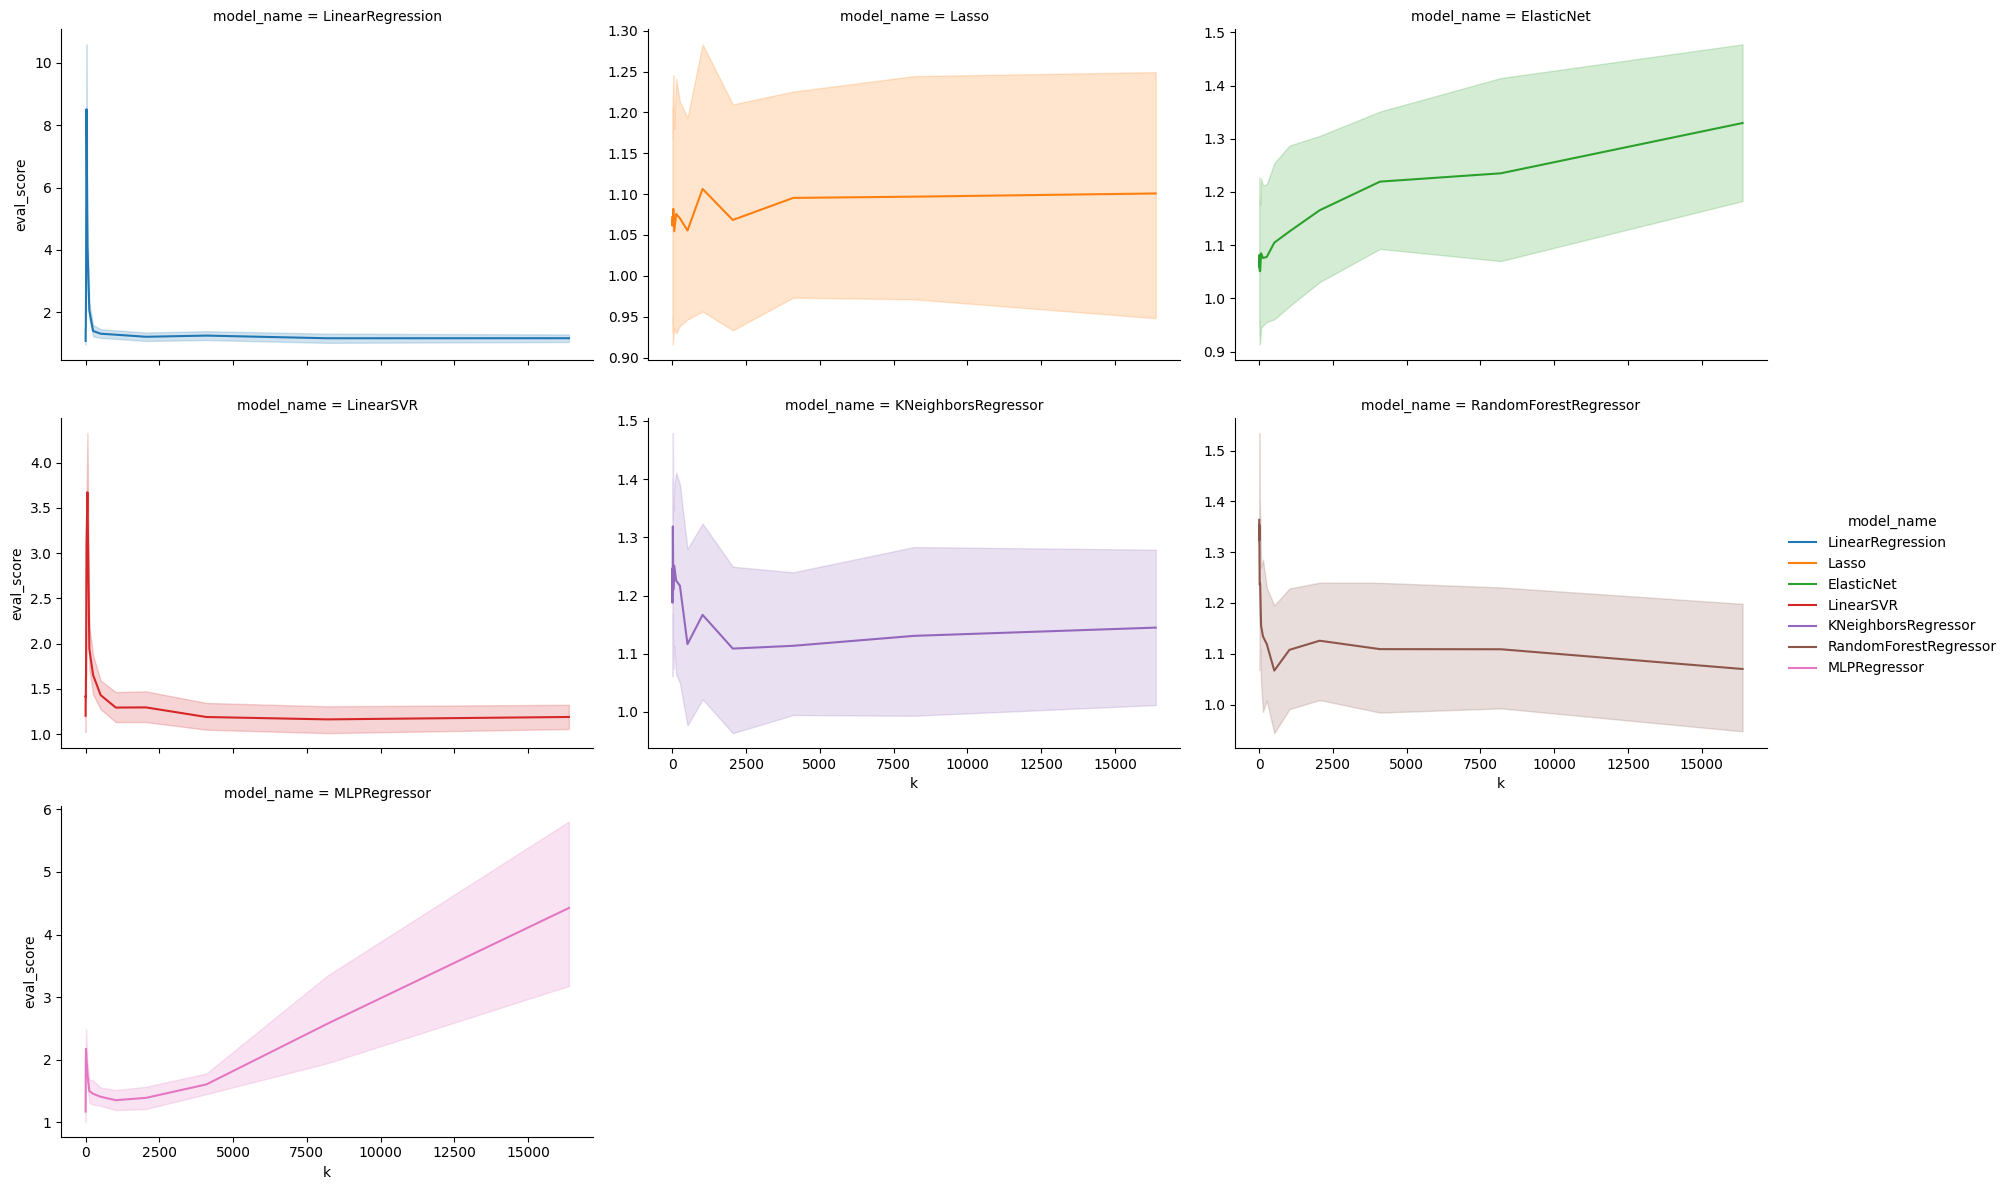

In [ ]:
# plot a line plot the average score and std for each k value over the i iterations, show error bar as std

import matplotlib.pyplot as plt
import seaborn as sns

# get rid of the outliers, 20 times the value of the label data's standard deviation is the cut-off
processed_evaluation_df = evaluation_df_lite[evaluation_df_lite['eval_score'] < y_std*5]
# processed_evaluation_df = evaluation_df_lite

# plot each model on the different figure, multi-figure plot

g = sns.FacetGrid(processed_evaluation_df, col='model_name', col_wrap=3, hue='model_name', height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'k', 'eval_score')
g.add_legend()
# plt.grid()
plt.show()

General conclusions from this result:
- Mean Squared Error (MSE) appear to be on average to be 1 in all models.
- Lasso, Random forest and knn are the most robust to large feature sets
- Elastic net and (especially) neural network potentially benefit the most from feature selection.

In [31]:
from sklearn.base import clone 
from joblib import Parallel, delayed, cpu_count

regression_models = [LinearRegression(), 
                     Lasso(), 
                     ElasticNet(), 
                     LinearSVR(max_iter=100000), 
                     KNeighborsRegressor(), 
                     RandomForestRegressor(), 
                     MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=20000, alpha=1)]

# regression_models = [Lasso(), ElasticNet(), KNeighborsRegressor()]
k_ranges = list(range(1, 100, 5))

# print(k_range)
iterations = 10
fold_split = 5
evaluation_df = pd.DataFrame(columns=['i', 'model_name', 'k', 'model', 'cv_number', 'feature_indices', 'eval_score'])


def parallel_func(i, k, model):
    outer_cv = KFold(n_splits=fold_split, shuffle=True)
    scores = []
    for j, (train_index, test_index) in enumerate(outer_cv.split(feature_data, label_data)):
        X_train, X_test = feature_data.iloc[train_index,:], feature_data.iloc[test_index,:]
        y_train, y_test = label_data.iloc[train_index], label_data.iloc[test_index]
        # print(f'------------ CV Numver: {i}')   
        
        random_feature_train, random_indices = fs.grand_random_selection(feature_data.iloc[train_index,:], k=k)

        # print(f'{i}, {j}, {k}, {model.__class__.__name__}, {random_indices}')

        model = clone(model)

        model.fit(X_train.iloc[:, random_indices], y_train)

        y_pred = model.predict(X_test.iloc[:, random_indices])
        mse = mean_squared_error(y_test, y_pred)
        scores.append(mse)
        # print(f'MSE: {mse:.4f}')

        new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [model], 'cv_number': [j], 'feature_indices': [random_indices], 'eval_score': [mse]})

        # add the evaluation instance to the dataframe
        # evaluation_df = pd.concat((evaluation_df, new_df), ignore_index=True)
    # NOTE: the dataframe is returned here is wrong, NEED TO FIX
    return new_df

def single_loop_func():
    total_count = len(regression_models) * len(k_ranges) * iterations * fold_split
    print(f'------------ Total Count {total_count} ------------')
    evaluation_df = pd.DataFrame(columns=['i', 'model_name', 'k', 'model', 'cv_number', 'feature_indices', 'eval_score'])
    for model in regression_models:
        for k in k_ranges:
            # print(f'------------ {outer_cv.get_n_splits()}-Fold on {k} features with {model.__class__.__name__} ------------')
            for i in range(iterations):
                outer_cv = KFold(n_splits=fold_split, shuffle=True)
                scores = []
                for j, (train_index, test_index) in enumerate(outer_cv.split(feature_data, label_data)):
                    
                    ## --- Data Preparation

                    X_train, X_test = feature_data.iloc[train_index,:], feature_data.iloc[test_index,:]
                    y_train, y_test = label_data.iloc[train_index], label_data.iloc[test_index]
                    # print(f'------------ CV Numver: {i}')   
                
                    ## --- Feature selection 
                    random_feature_train, random_indices = fs.grand_random_selection(feature_data.iloc[train_index,:], k=k)

                    # print(f'{i}, {j}, {k}, {model.__class__.__name__}, {random_indices}')

                    ## --- Model training 

                    model = clone(model)

                    model.fit(X_train.iloc[:, random_indices], y_train)

                    ## --- Model evaluation

                    y_pred = model.predict(X_test.iloc[:, random_indices])
                    mse = mean_squared_error(y_test, y_pred)
                    scores.append(mse)
                    # print(f'MSE: {mse:.4f}')

                    ## --- Result collection

                    new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [model], 'cv_number': [j], 'feature_indices': [random_indices], 'eval_score': [mse]})

                    # add the evaluation instance to the dataframe
                    evaluation_df = pd.concat((evaluation_df, new_df), ignore_index=True)

                # print model name and selected K value
                print(f'Count {evaluation_df.shape[0]}/{total_count}, {i}-th iter: {k} features with {model.__class__.__name__}, Average MSE: {np.mean(scores):.4f}, std: {np.std(scores):.4f}')
                # # print the average score and std
                # print(f'Average MSE: {np.mean(scores):.4f}, std: {np.std(scores):.4f}')
    return evaluation_df


#### UNCOMMENT CODE BELOW TO RUN THE CODE AS SINGLE CORE ####
#### THIS ALLOWS FOR MESSAGES TO BE PRINTED ####

evaluation_df = single_loop_func()

#### UNCOMMENT CODE BELOW TO RUN THE CODE AS MULTI-CORE ####
#### THIS ALLOWS FOR MESSAGES TO BE PRINTED ####

# all_cpus = cpu_count()
# half_cpus = int(all_cpus/2)

# eval_list_total = []
# for model in regression_models:
#     evaluation_list = Parallel(n_jobs=half_cpus)(delayed(parallel_func)(i, k, model) for i in range(iterations) for k in k_ranges)
#     for evaluation in evaluation_list:
#         eval_list_total.append(evaluation)
#     print(f'--- Finished {model.__class__.__name__} using {half_cpus} cores ---')


# # concat the list of dataframes into one dataframe
# evaluation_df = pd.concat(eval_list_total, ignore_index=True)



------------ Total Count 7000 ------------
Count 5/7000, 0-th iter: 1 features with LinearRegression, Average MSE: 1.0881, std: 0.4164
Count 10/7000, 1-th iter: 1 features with LinearRegression, Average MSE: 1.0065, std: 0.3916
Count 15/7000, 2-th iter: 1 features with LinearRegression, Average MSE: 1.0697, std: 0.3951
Count 20/7000, 3-th iter: 1 features with LinearRegression, Average MSE: 1.1359, std: 0.5756
Count 25/7000, 4-th iter: 1 features with LinearRegression, Average MSE: 1.1295, std: 0.4550
Count 30/7000, 5-th iter: 1 features with LinearRegression, Average MSE: 1.1505, std: 0.4768
Count 35/7000, 6-th iter: 1 features with LinearRegression, Average MSE: 1.0563, std: 0.4934
Count 40/7000, 7-th iter: 1 features with LinearRegression, Average MSE: 1.1700, std: 0.8361
Count 45/7000, 8-th iter: 1 features with LinearRegression, Average MSE: 1.1018, std: 0.6177
Count 50/7000, 9-th iter: 1 features with LinearRegression, Average MSE: 0.9996, std: 0.5571
Count 55/7000, 0-th iter: 6 

c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Count 3375/7000, 4-th iter: 36 features with LinearSVR, Average MSE: 3.3088, std: 0.7085
Count 3380/7000, 5-th iter: 36 features with LinearSVR, Average MSE: 3.8701, std: 1.9185
Count 3385/7000, 6-th iter: 36 features with LinearSVR, Average MSE: 4.2293, std: 1.3314
Count 3390/7000, 7-th iter: 36 features with LinearSVR, Average MSE: 3.3930, std: 1.7258
Count 3395/7000, 8-th iter: 36 features with LinearSVR, Average MSE: 3.5324, std: 1.0638
Count 3400/7000, 9-th iter: 36 features with LinearSVR, Average MSE: 2.7650, std: 0.8449
Count 3405/7000, 0-th iter: 41 features with LinearSVR, Average MSE: 2.8634, std: 1.1251
Count 3410/7000, 1-th iter: 41 features with LinearSVR, Average MSE: 2.9475, std: 1.3617
Count 3415/7000, 2-th iter: 41 features with LinearSVR, Average MSE: 5.0694, std: 2.5372
Count 3420/7000, 3-th iter: 41 features with LinearSVR, Average MSE: 3.6470, std: 1.2787
Count 3425/7000, 4-th iter: 41 features with LinearSVR, Average MSE: 4.3310, std: 1.9419
Count 3430/7000, 5-th

In [32]:
evaluation_df_lite = evaluation_df[['i', 'model_name', 'k', 'cv_number', 'feature_indices', 'eval_score']]
evaluation_df_lite.head()

,i,model_name,k,cv_number,feature_indices,eval_score
0,0,LinearRegression,1,0,[7646],1.417246
1,0,LinearRegression,1,1,[6047],1.698427
2,0,LinearRegression,1,2,[13077],0.529421
3,0,LinearRegression,1,3,[2127],0.870374
4,0,LinearRegression,1,4,[3960],0.924876


In [33]:
evaluation_df_lite.to_pickle('data/processed-results/ribociclib_ccle_gdsc2_evaluation_df_lite_random_feature_selection_100.pkl')


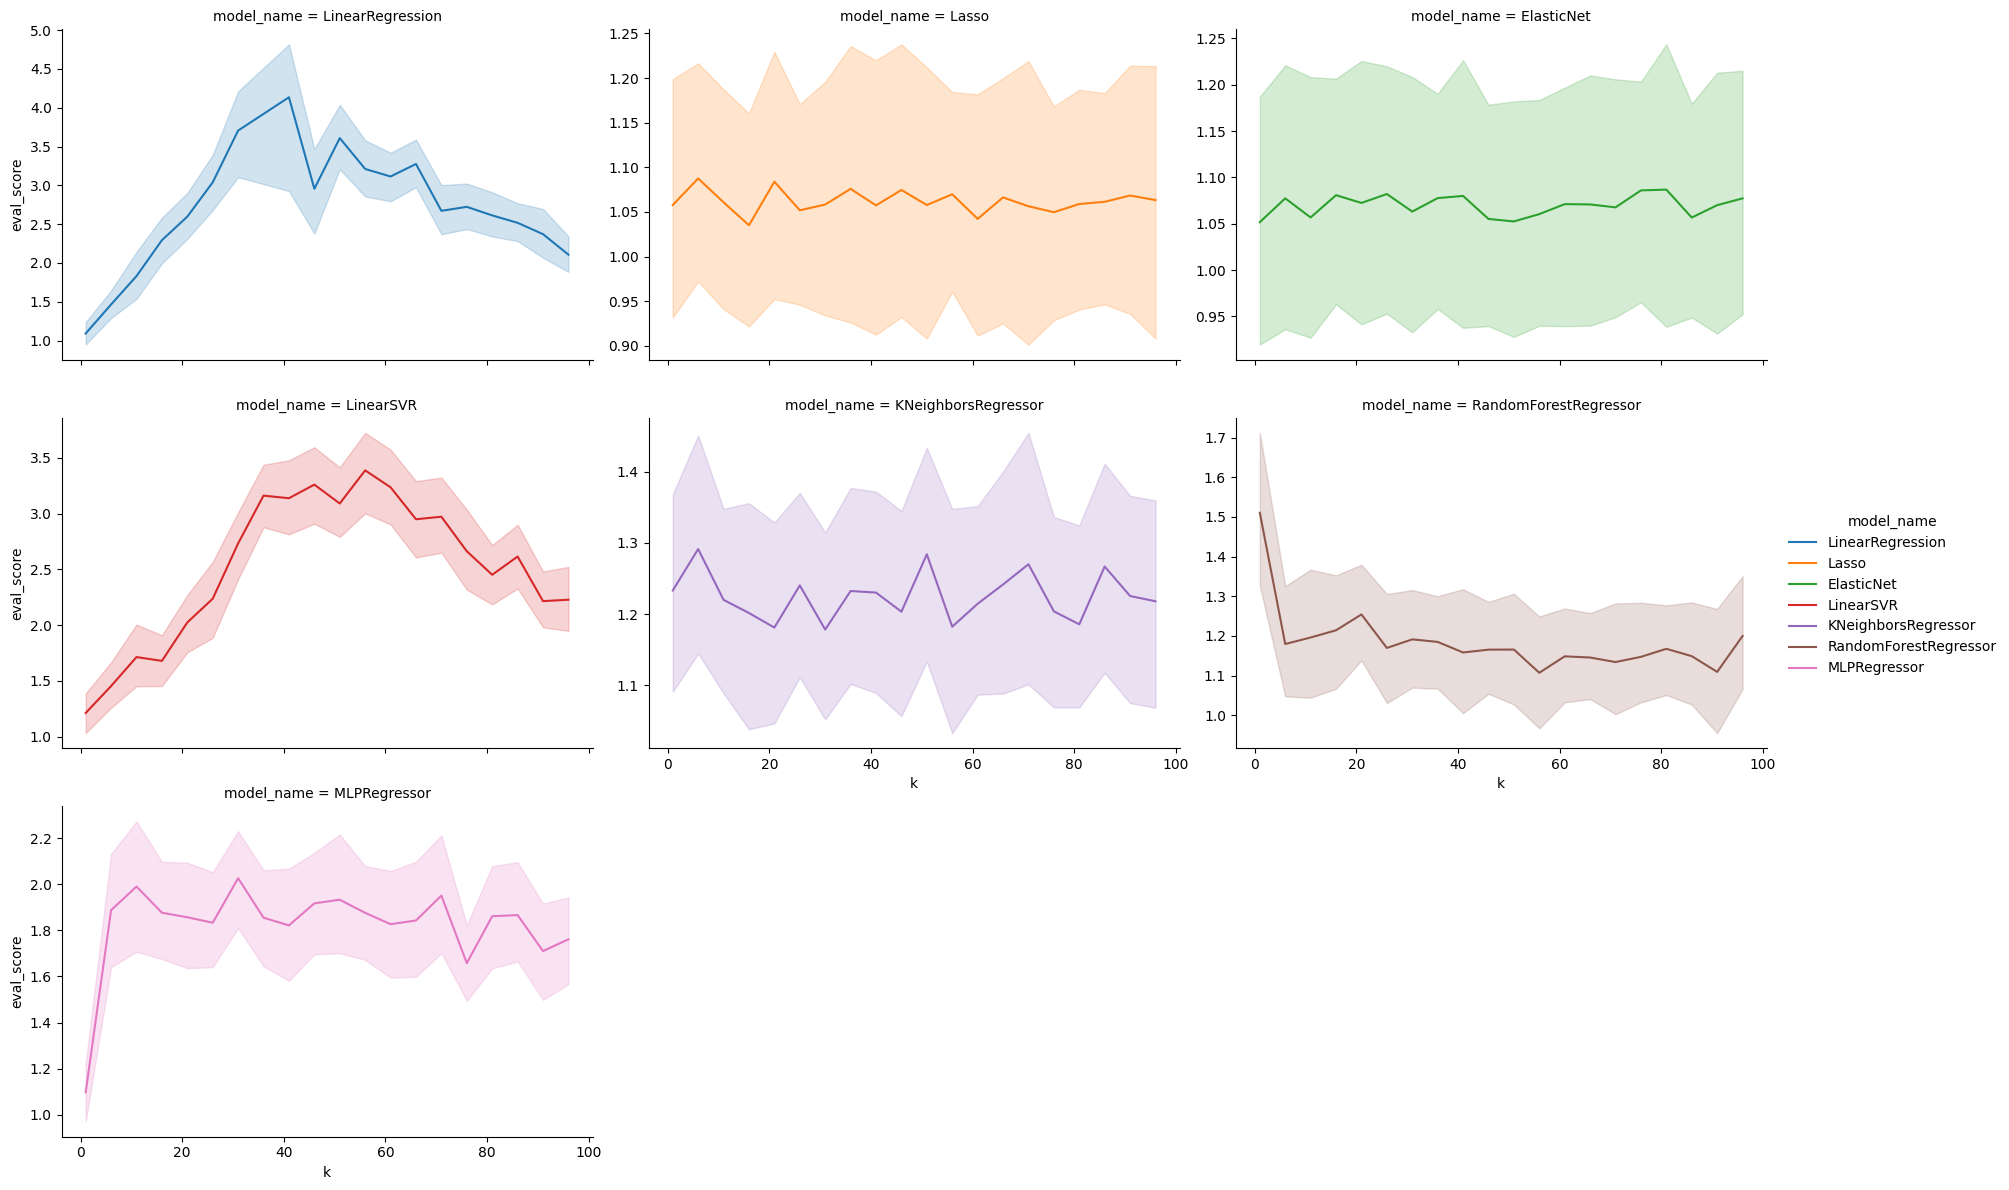

In [34]:
# plot a line plot the average score and std for each k value over the i iterations, show error bar as std

import matplotlib.pyplot as plt
import seaborn as sns

# get rid of the outliers, 20 times the value of the label data's standard deviation is the cut-off
processed_evaluation_df = evaluation_df_lite[evaluation_df_lite['eval_score'] < y_std*5]
# processed_evaluation_df = evaluation_df_lite

# plot each model on the different figure, multi-figure plot

g = sns.FacetGrid(processed_evaluation_df, col='model_name', col_wrap=3, hue='model_name', height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'k', 'eval_score')
g.add_legend()
# plt.grid()
plt.show()

## Run 4 - Feature Selection Using GFFS and MRMR 

In [7]:
## LOADING DATA

import pickle
import dynmarker.FeatureSelection as fs 

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)

feature_data, label_data = fs.create_feature_and_label(ribociclib_data)

In [8]:
from sklearn.base import clone 
from joblib import Parallel, delayed, cpu_count
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

class EvaluationPipeline:

    def __init__(self):

        self.evaluation_df = pd.DataFrame(columns=['i', 'model_name', 'k', 'model', 'cv_number', 'feature_indices', 'eval_score'])

        self.run_model_func = None
        self.function_set = False

    def set_function(self, func):
        self.run_model_func = func 
        self.function_set = True

    def run_function(self, X, y, iterations, k_ranges, model_list, n_fold_splits=5, n_cores=1, **kwargs):

        if self.function_set == False:
            raise ValueError('EvaluationPipeline: The function to be run has not been set')
        if n_cores == 1:
            # run the function in serial, single core, allows for printing
            for model in model_list:
                for i in range(iterations):
                    for k in k_ranges:
                        df_cv = self.run_model_func(X, y, i, k, model, n_fold_splits, verbose=1, **kwargs)
                        for df in df_cv:
                            self.evaluation_df = pd.concat((self.evaluation_df, df), ignore_index=True)
                print(f'--- Finished {model.__class__.__name__} using {n_cores} core ---')
        elif n_cores == -1:
            # run the function in parallel with all available cores
            models = model_list
            eval_list_total = []
            for model in models:
                evaluation_list = Parallel(n_jobs=cpu_count())(delayed(self.run_model_func)(X, y, i, k, model, n_fold_splits, verbose=0, **kwargs) for i in range(iterations) for k in k_ranges)
                for evaluation in evaluation_list:
                    for ev in evaluation:
                        eval_list_total.append(ev)
                print(f'--- Finished {model.__class__.__name__} using {cpu_count()} cores ---')
            self.evaluation_df = pd.concat(eval_list_total, ignore_index=True)
        else:
            # run the function in parallel with n_jobs cores
            models = model_list
            eval_list_total = []
            for model in models:
                evaluation_list = Parallel(n_jobs=n_cores)(delayed(self.run_model_func)(X, y, i, k, model, n_fold_splits, verbose=0, **kwargs) for i in range(iterations) for k in k_ranges)
                for evaluation in evaluation_list:
                    for ev in evaluation:
                        eval_list_total.append(ev)
                print(f'--- Finished {model.__class__.__name__} using {n_cores} cores ---')
            self.evaluation_df = pd.concat(eval_list_total, ignore_index=True)

def example_run_model_func(X, y, i, k, model, n_fold_splits, verbose=0, **kwargs):
    all_dfs = []
    keepModel = kwargs.get('keepModel', False)
    outer_cv = KFold(n_splits=n_fold_splits, shuffle=True)
    scores = []
    for j, (train_index, test_index) in enumerate(outer_cv.split(X, y)):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # print(f'------------ CV Numver: {i}')   
        
        random_feature_train, random_indices = fs.grand_random_selection(X.iloc[train_index,:], k=k)

        # print(f'{i}, {j}, {k}, {model.__class__.__name__}, {random_indices}')

        model = clone(model)

        model.fit(X_train.iloc[:, random_indices], y_train)

        y_pred = model.predict(X_test.iloc[:, random_indices])
        mse = mean_squared_error(y_test, y_pred)
        scores.append(mse)
        # print(f'MSE: {mse:.4f}')

        if keepModel == True:
            new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [model], 'cv_number': [j], 'feature_indices': [random_indices], 'eval_score': [mse]})
        else:
            new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [None], 'cv_number': [j], 'feature_indices': [random_indices], 'eval_score': [mse]})

        all_dfs.append(new_df)
        # add the evaluation instance to the dataframe
        # evaluation_df = pd.concat((evaluation_df, new_df), ignore_index=True)

    if verbose == 1:
        print(f'-- Iteration: {i}, feature size: {k}, model: {model.__class__.__name__}, Avg Eval Score: {np.mean(scores):.4f}, Std Eval Score: {np.std(scores):.4f}')
    
    return all_dfs

In [9]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [10]:
instance = EvaluationPipeline()
instance.set_function(example_run_model_func)
instance.run_function(feature_data, label_data, iterations=1, k_ranges=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], model_list=[LinearRegression(), RandomForestRegressor()], n_fold_splits=5, n_cores=1, keepModel=False)



-- Iteration: 0, feature size: 10, model: LinearRegression, Avg Eval Score: 1.4562, Std Eval Score: 0.4527
-- Iteration: 0, feature size: 20, model: LinearRegression, Avg Eval Score: 6.7440, Std Eval Score: 9.5452
-- Iteration: 0, feature size: 30, model: LinearRegression, Avg Eval Score: 6.1304, Std Eval Score: 4.0588
-- Iteration: 0, feature size: 40, model: LinearRegression, Avg Eval Score: 51.5179, Std Eval Score: 36.6178
-- Iteration: 0, feature size: 50, model: LinearRegression, Avg Eval Score: 8.3850, Std Eval Score: 2.7415
-- Iteration: 0, feature size: 60, model: LinearRegression, Avg Eval Score: 6.0176, Std Eval Score: 3.2407
-- Iteration: 0, feature size: 70, model: LinearRegression, Avg Eval Score: 2.1332, Std Eval Score: 1.2159
-- Iteration: 0, feature size: 80, model: LinearRegression, Avg Eval Score: 2.1866, Std Eval Score: 0.7155
-- Iteration: 0, feature size: 90, model: LinearRegression, Avg Eval Score: 3.0352, Std Eval Score: 0.8833
-- Iteration: 0, feature size: 100,

In [11]:
instance.evaluation_df.head()

,i,model_name,k,model,cv_number,feature_indices,eval_score
0,0,LinearRegression,10,None,0,"[5120, 4505, 4241, 9210, 18011, 156, 12467, 77...",1.412629
1,0,LinearRegression,10,None,1,"[18315, 11750, 863, 16800, 14417, 3922, 14990,...",1.597406
2,0,LinearRegression,10,None,2,"[14986, 7298, 17782, 11284, 8677, 14700, 1652,...",2.186264
3,0,LinearRegression,10,None,3,"[18317, 12480, 5131, 18079, 8897, 3659, 3985, ...",0.790075
4,0,LinearRegression,10,None,4,"[16088, 4152, 15381, 6974, 13274, 17323, 13748...",1.294429


In [14]:
def f_regression_feature_selection(X: pd.DataFrame, y: pd.DataFrame, i, k, model, n_fold_splits, verbose=0, **kwargs):
    all_dfs = []
    keepModel = kwargs.get('keepModel', False)
    outer_cv = KFold(n_splits=n_fold_splits, shuffle=True)
    scores = []
    for j, (train_index, test_index) in enumerate(outer_cv.split(X, y)):
        
        # -- Data Preprocessing -- #

        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # print(f'------------ CV Numver: {i}')   

        # -- Feature Selection -- #

        selector =  SelectKBest(score_func=f_regression, k=k) 
        
        selector.fit(X_train, y_train)

        selected_indices = selector.get_support(indices=True)

        # -- Model Training -- #

        # print(f'{i}, {j}, {k}, {model.__class__.__name__}, {random_indices}')

        model = clone(model)

        model.fit(X_train.iloc[:, selected_indices], y_train)

        # -- Model Evaluation -- #

        y_pred = model.predict(X_test.iloc[:, selected_indices])
        mse = mean_squared_error(y_test, y_pred)
        scores.append(mse)
        # print(f'MSE: {mse:.4f}')

        # -- Data Collection -- #

        if keepModel == True:
            new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [model], 'cv_number': [j], 'feature_indices': [selected_indices], 'eval_score': [mse]})
        else:
            new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [None], 'cv_number': [j], 'feature_indices': [selected_indices], 'eval_score': [mse]})

        all_dfs.append(new_df)
        # add the evaluation instance to the dataframe
        # evaluation_df = pd.concat((evaluation_df, new_df), ignore_index=True)

    if verbose == 1:
        print(f'-- Iteration: {i}, feature size: {k}, model: {model.__class__.__name__}, Avg Eval Score: {np.mean(scores):.4f}, Std Eval Score: {np.std(scores):.4f}')
    
    return all_dfs

In [25]:
instance_f_reg = EvaluationPipeline()
instance_f_reg.set_function(f_regression_feature_selection)
instance_f_reg.run_function(feature_data, label_data, iterations=1, k_ranges=range(1,100,10), model_list=[MLPRegressor(hidden_layer_sizes=(100,64,32), max_iter=20000), RandomForestRegressor()], n_fold_splits=5, n_cores=1, keepModel=False)

-- Iteration: 0, feature size: 1, model: MLPRegressor, Avg Eval Score: 1.4425, Std Eval Score: 1.1226
-- Iteration: 0, feature size: 11, model: MLPRegressor, Avg Eval Score: 4.0274, Std Eval Score: 4.5237
-- Iteration: 0, feature size: 21, model: MLPRegressor, Avg Eval Score: 1.7569, Std Eval Score: 0.5142
-- Iteration: 0, feature size: 31, model: MLPRegressor, Avg Eval Score: 2.7937, Std Eval Score: 1.1807
-- Iteration: 0, feature size: 41, model: MLPRegressor, Avg Eval Score: 2.0806, Std Eval Score: 0.8000
-- Iteration: 0, feature size: 51, model: MLPRegressor, Avg Eval Score: 1.5127, Std Eval Score: 0.7198
-- Iteration: 0, feature size: 61, model: MLPRegressor, Avg Eval Score: 1.5257, Std Eval Score: 0.8367
-- Iteration: 0, feature size: 71, model: MLPRegressor, Avg Eval Score: 1.9550, Std Eval Score: 0.8662
-- Iteration: 0, feature size: 81, model: MLPRegressor, Avg Eval Score: 1.8928, Std Eval Score: 1.2133
-- Iteration: 0, feature size: 91, model: MLPRegressor, Avg Eval Score: 1.

In [26]:
instance_f_reg.evaluation_df.head()

,i,model_name,k,model,cv_number,feature_indices,eval_score
0,0,MLPRegressor,1,None,0,[3720],0.714144
1,0,MLPRegressor,1,None,1,[6183],0.68528
2,0,MLPRegressor,1,None,2,[1840],3.647806
3,0,MLPRegressor,1,None,3,[1368],1.275809
4,0,MLPRegressor,1,None,4,[8182],0.88953


In [27]:
# load the dataframe from the pickle file

import pandas as pd

evaluation_df_lite = pd.read_pickle('data/processed-results/ribociclib_ccle_gdsc2_evaluation_df_lite_random_feature_selection_100.pkl')

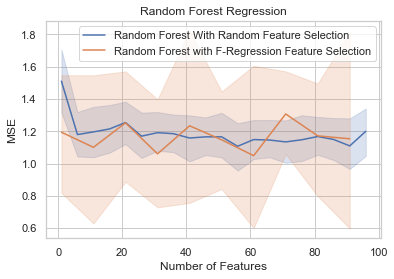

In [31]:
# compare the results of the two methods by plotting the results using seaborn

f_reg_df = instance_f_reg.evaluation_df

# extract random forest from evaluation_lite 
rf_df = evaluation_df_lite[evaluation_df_lite['model_name'] == 'RandomForestRegressor']

# extract random forest from evaluation_f_reg
rf_f_reg_df = f_reg_df[f_reg_df['model_name'] == 'RandomForestRegressor']

# extract mlp from evaluation_lite
mlp_df = evaluation_df_lite[evaluation_df_lite['model_name'] == 'MLPRegressor']

# extract mlp from evaluation_f_reg
mlp_f_reg_df = f_reg_df[f_reg_df['model_name'] == 'MLPRegressor']

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# plot the results of the random forest model
sns.lineplot(data=rf_df, x="k", y="eval_score", label="Random Forest With Random Feature Selection")
sns.lineplot(data=rf_f_reg_df, x="k", y="eval_score", label="Random Forest with F-Regression Feature Selection")

plt.title('Random Forest Regression')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.legend()
plt.show()


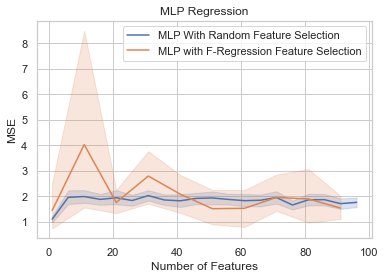

In [32]:
# plot the results of the mlp model
sns.lineplot(data=mlp_df, x="k", y="eval_score", label="MLP With Random Feature Selection")
sns.lineplot(data=mlp_f_reg_df, x="k", y="eval_score", label="MLP with F-Regression Feature Selection")

plt.title('MLP Regression')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [38]:
f, p = f_regression(feature_data, label_data)

# zip the scores and the indices together

f_scores = list(zip(f, range(len(f))))
for i in sorted(f_scores, reverse=True):
    print(i)

(24.05328882360086, 3720)
(23.207173495967876, 8182)
(22.020571410849886, 6183)
(19.75970754702939, 1368)
(17.192091044386316, 16792)
(16.919628286532426, 13848)
(15.928446630034077, 59)
(15.160676990890257, 18564)
(15.142134563075588, 11230)
(14.981899368910724, 11563)
(14.844940365354287, 11092)
(14.812841521347588, 14748)
(14.72834766256964, 10752)
(14.11271045584335, 11308)
(13.759096305091722, 10604)
(13.71697481533636, 307)
(13.58738927135404, 12543)
(13.402769352547756, 16881)
(13.243065909941743, 10627)
(13.162929309987577, 13882)
(12.707504817706164, 6625)
(12.414475855896228, 8949)
(12.341580286597432, 8108)
(12.337048682364866, 1840)
(12.264231966363065, 18955)
(12.231887174774302, 17831)
(12.172109604639896, 18835)
(12.155525668896939, 16720)
(12.13242575338953, 1118)
(11.999251701049962, 4557)
(11.905868569887584, 1469)
(11.905822739140051, 19146)
(11.87784104453981, 16674)
(11.723894226237958, 12361)
(11.652221727268548, 15615)
(11.52191748770604, 15758)
(11.4822748583637

In [42]:
from dynmarker.FeatureSelection import greedy_forward_select
from sklearn.feature_selection import mutual_info_regression

def gffs_feature_selection(X: pd.DataFrame, y: pd.DataFrame, i, k, model, n_fold_splits, verbose=0, **kwargs):
    all_dfs = []
    keepModel = kwargs.get('keepModel', False)
    outer_cv = KFold(n_splits=n_fold_splits, shuffle=True)
    scores = []
    for j, (train_index, test_index) in enumerate(outer_cv.split(X, y)):
        
        # -- Data Preprocessing -- #

        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # print(f'------------ CV Numver: {i}')   

        # -- Feature Selection -- #

        f_scores, p_vals = f_regression(X_train, y_train)
        ranked_features = list(zip(f_scores, range(len(f_scores))))

        selected_indices, gffs_feature_scores = greedy_forward_select(X_train, y_train, k, clone(model), ranked_features, 'neg_mean_squared_error', verbose=0)

        # -- Model Training -- #

        # print(f'{i}, {j}, {k}, {model.__class__.__name__}, {random_indices}')

        model = clone(model)

        model.fit(X_train.iloc[:, selected_indices], y_train)

        # -- Model Evaluation -- #

        y_pred = model.predict(X_test.iloc[:, selected_indices])
        mse = mean_squared_error(y_test, y_pred)
        scores.append(mse)
        # print(f'MSE: {mse:.4f}')

        # -- Data Collection -- #

        if keepModel == True:
            new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [model], 'cv_number': [j], 'feature_indices': [selected_indices], 'eval_score': [mse]})
        else:
            new_df = pd.DataFrame({'i': [i], 'model_name': [model.__class__.__name__], 'k': [k], 'model': [None], 'cv_number': [j], 'feature_indices': [selected_indices], 'eval_score': [mse]})

        all_dfs.append(new_df)
        # add the evaluation instance to the dataframe
        # evaluation_df = pd.concat((evaluation_df, new_df), ignore_index=True)

    if verbose == 1:
        print(f'-- Iteration: {i}, feature size: {k}, model: {model.__class__.__name__}, Avg Eval Score: {np.mean(scores):.4f}, Std Eval Score: {np.std(scores):.4f}')
    
    return all_dfs

In [43]:
instance_gffs = EvaluationPipeline()
instance_gffs.set_function(gffs_feature_selection)
instance_gffs.run_function(feature_data, label_data, iterations=1, k_ranges=range(1,100,10), model_list=[ElasticNet(), MLPRegressor(hidden_layer_sizes=(100,64,32), max_iter=20000), RandomForestRegressor()], n_fold_splits=5, n_cores=1, keepModel=False)

-- Iteration: 0, feature size: 1, model: MLPRegressor, Avg Eval Score: 1.5016, Std Eval Score: 0.9128


c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## Run 5 - Transforming into Classification problem 

In [1]:
## LOADING DATA

import pickle
import dynmarker.FeatureSelection as fs 

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)



In [2]:
import pandas as pd 

In [3]:
# select top 25% IC50 values and bottom 25% IC50 values from ribociclib data

ribociclib_data_top = ribociclib_data[ribociclib_data['LN_IC50'] > ribociclib_data['LN_IC50'].quantile(0.75)]
ribociclib_data_bottom = ribociclib_data[ribociclib_data['LN_IC50'] < ribociclib_data['LN_IC50'].quantile(0.25)]

In [4]:
ribociclib_data_top.head()

,LN_IC50,CELLLINE,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
SANGER_MODEL_ID,,,,,,,,,,,,,,,,,,,,,
SIDM00877,6.135124,ACH-000196,4.349082,0.0,6.479942,2.790772,4.031219,0.070389,0.070389,4.682011,...,0.400538,0.084064,0.150560,1.823749,0.163499,0.042644,0.097611,0.084064,0.042644,0.475085
SIDM00940,6.988548,ACH-000212,4.347666,0.0,6.996728,1.594549,3.329124,0.014355,1.378512,6.142618,...,0.722466,0.622930,0.321928,1.823749,0.097611,0.000000,0.545968,0.000000,0.000000,0.000000
SIDM00633,6.417215,ACH-000759,5.142822,0.0,6.461561,4.201634,4.149747,0.056584,3.570463,3.910733,...,0.333424,0.516015,0.622930,1.263034,0.189034,0.000000,0.505891,0.000000,0.042644,0.000000
SIDM00971,4.671432,ACH-000828,3.472488,0.0,5.959306,3.878725,3.646163,0.000000,0.042644,4.711495,...,0.918386,0.565597,0.422233,1.257011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SIDM00928,5.173938,ACH-000857,4.866413,0.0,5.722739,1.769772,3.463361,0.176323,0.432959,5.730368,...,0.659925,1.007196,0.432959,2.201634,0.000000,0.000000,3.440952,0.000000,0.000000,0.000000


In [5]:
ribociclib_data_bottom.head()

,LN_IC50,CELLLINE,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
SANGER_MODEL_ID,,,,,,,,,,,,,,,,,,,,,
SIDM00884,3.146215,ACH-000699,3.481557,0.0,7.070389,2.341986,3.679199,0.176323,3.420887,5.854494,...,2.327687,0.226509,0.650765,2.477677,0.000000,0.000000,0.042644,0.000000,0.084064,0.000000
SIDM00772,3.074197,ACH-000755,3.587365,0.0,6.563463,2.636915,3.640390,0.014355,0.042644,4.506526,...,1.250962,1.627607,0.150560,0.773996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SIDM00148,3.027614,ACH-000019,2.403268,0.0,7.490249,2.606442,3.177918,0.014355,0.056584,6.759688,...,3.419539,1.731183,0.250962,2.003602,0.356144,0.000000,0.000000,0.000000,0.000000,0.000000
SIDM00146,3.306478,ACH-000768,3.577731,0.0,6.330021,2.327687,4.638653,0.111031,2.032101,5.968782,...,1.510962,1.827819,0.956057,2.992768,0.000000,0.000000,0.084064,0.000000,0.000000,0.097611
SIDM00893,3.071053,ACH-000536,3.344828,0.0,7.088099,2.948601,4.029453,0.070389,0.084064,5.381283,...,1.007196,0.070389,0.575312,1.744161,0.000000,0.014355,0.000000,0.014355,0.014355,0.000000


In [6]:
# median value of LN_IC50 in the original dataset

ribociclib_data['LN_IC50'].median()

3.8731465

In [7]:
# create a new column in the ribociclib data that indicates whether the compound is in the top or bottom 25% of the dataset
# 1 = top 25%, 0 = bottom 25%

ribociclib_data_top.insert(0, 'class', 1)
ribociclib_data_bottom.insert(0, 'class', 0)

In [8]:
# combine the top and bottom dataframes

ribociclib_data_class = pd.concat([ribociclib_data_top, ribociclib_data_bottom], ignore_index=True)

ribociclib_data_class.head(22)

,class,LN_IC50,CELLLINE,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
0,1,6.135124,ACH-000196,4.349082,0.000000,6.479942,2.790772,4.031219,0.070389,0.070389,...,0.400538,0.084064,0.150560,1.823749,0.163499,0.042644,0.097611,0.084064,0.042644,0.475085
1,1,6.988548,ACH-000212,4.347666,0.000000,6.996728,1.594549,3.329124,0.014355,1.378512,...,0.722466,0.622930,0.321928,1.823749,0.097611,0.000000,0.545968,0.000000,0.000000,0.000000
2,1,6.417215,ACH-000759,5.142822,0.000000,6.461561,4.201634,4.149747,0.056584,3.570463,...,0.333424,0.516015,0.622930,1.263034,0.189034,0.000000,0.505891,0.000000,0.042644,0.000000
3,1,4.671432,ACH-000828,3.472488,0.000000,5.959306,3.878725,3.646163,0.000000,0.042644,...,0.918386,0.565597,0.422233,1.257011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,5.173938,ACH-000857,4.866413,0.000000,5.722739,1.769772,3.463361,0.176323,0.432959,...,0.659925,1.007196,0.432959,2.201634,0.000000,0.000000,3.440952,0.000000,0.000000,0.000000
5,1,5.454185,ACH-000856,5.705425,0.000000,6.413289,3.298658,4.052242,0.124328,3.030336,...,1.608809,0.000000,0.485427,2.646163,0.201634,0.000000,0.056584,0.000000,0.124328,0.000000
6,1,5.966060,ACH-000818,3.528571,0.000000,6.583308,3.724650,3.235727,0.070389,0.084064,...,0.454176,0.097611,0.475085,1.454176,0.056584,0.028569,0.056584,0.028569,0.028569,0.000000
7,1,4.653063,ACH-000573,2.970854,0.000000,6.381802,2.903038,4.553975,1.169925,0.214125,...,0.839960,0.475085,0.124328,1.895303,0.226509,0.056584,0.321928,0.000000,0.056584,0.799087
8,1,5.756598,ACH-000352,3.544733,0.000000,5.981396,3.608809,3.861955,0.014355,0.485427,...,3.304511,0.000000,0.084064,1.565597,0.298658,0.084064,0.000000,0.000000,0.084064,0.000000
9,1,5.165604,ACH-000643,4.498251,0.000000,6.052459,2.056584,3.471187,0.263034,3.237258,...,0.632268,0.773996,0.333424,1.778209,0.238787,0.000000,0.084064,0.042644,0.042644,0.000000


In [9]:
ribociclib_data_class.tail()

,class,LN_IC50,CELLLINE,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
17,0,2.935018,ACH-000930,4.478325,0.000000,6.803873,3.095924,4.197708,0.070389,0.275007,...,0.189034,0.000000,0.389567,3.307429,0.584963,0.333424,0.014355,0.000000,0.000000,0.000000
18,0,3.165310,ACH-000668,5.035184,0.028569,6.377644,3.614710,4.981396,0.594549,1.378512,...,2.336283,1.831877,0.485427,2.134221,0.275007,0.042644,3.010780,0.042644,0.042644,0.000000
19,0,2.940723,ACH-000910,0.201634,0.000000,5.992089,3.814550,4.004501,0.000000,0.056584,...,2.776104,2.179511,0.713696,0.910733,0.263034,0.000000,0.000000,0.000000,0.000000,0.028569
20,0,3.388507,ACH-001819,0.298658,0.000000,7.740928,2.709291,3.689299,0.056584,0.250962,...,1.263034,0.000000,0.163499,3.313246,0.555816,0.000000,0.014355,0.000000,0.000000,0.000000
21,0,2.810930,ACH-000876,3.641546,0.000000,6.368245,1.989139,2.419539,0.014355,2.214125,...,0.632268,0.985500,0.111031,1.827819,0.000000,0.000000,0.014355,0.000000,0.000000,0.000000


In [10]:
ribociclib_data_class.shape

(22, 19224)

In [11]:
import pandas as pd
import numpy as np 
import dynmarker.FeatureSelection as fs

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [12]:
# split the data into features and labels

feature_data, label_data = fs.create_feature_and_label(ribociclib_data_class, 'class')


In [13]:
feature_data.drop(['LN_IC50'], axis=1, inplace=True)
feature_data.head()


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
0,4.349082,0.0,6.479942,2.790772,4.031219,0.070389,0.070389,4.682011,5.632850,4.441616,...,0.400538,0.084064,0.150560,1.823749,0.163499,0.042644,0.097611,0.084064,0.042644,0.475085
1,4.347666,0.0,6.996728,1.594549,3.329124,0.014355,1.378512,6.142618,4.265287,4.254745,...,0.722466,0.622930,0.321928,1.823749,0.097611,0.000000,0.545968,0.000000,0.000000,0.000000
2,5.142822,0.0,6.461561,4.201634,4.149747,0.056584,3.570463,3.910733,4.574102,4.196135,...,0.333424,0.516015,0.622930,1.263034,0.189034,0.000000,0.505891,0.000000,0.042644,0.000000
3,3.472488,0.0,5.959306,3.878725,3.646163,0.000000,0.042644,4.711495,5.472488,3.932628,...,0.918386,0.565597,0.422233,1.257011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.866413,0.0,5.722739,1.769772,3.463361,0.176323,0.432959,5.730368,4.417515,3.218781,...,0.659925,1.007196,0.432959,2.201634,0.000000,0.000000,3.440952,0.000000,0.000000,0.000000


In [14]:
label_data.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [16]:
from sklearn.model_selection import StratifiedKFold

fs.naive_test_classification(feature_data, label_data, cv=StratifiedKFold(n_splits=5))

------ Naive test - Logistic Regression
Logistic Regression score: 0.4900, std: 0.1800
------ Naive test - Linear SVC
Linear SVC score: 0.4500, std: 0.1183
------ Naive test - KNN
KNN score: 0.4600, std: 0.1356
------ Naive test - Random Forest
Random Forest score: 0.3700, std: 0.2182
------ Naive test - MLP
MLP score: 0.5100, std: 0.1281


In [17]:
from sklearn.datasets import load_breast_cancer

benchmark_breast_cancer_X, benchmark_breast_cancer_y = load_breast_cancer(as_frame=True, return_X_y=True)

In [18]:
fs.naive_test_classification(benchmark_breast_cancer_X, benchmark_breast_cancer_y, cv=StratifiedKFold(n_splits=5))

c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

------ Naive test - Logistic Regression
Logistic Regression score: 0.9490, std: 0.0102


c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

------ Naive test - Linear SVC
Linear SVC score: 0.8911, std: 0.0572
------ Naive test - KNN
KNN score: 0.9279, std: 0.0218
------ Naive test - Random Forest
Random Forest score: 0.9649, std: 0.0222
------ Naive test - MLP
MLP score: 0.9156, std: 0.0162


In [23]:
from sklearn.datasets import load_diabetes

benchmark_diabetes_X, benchmark_diabetes_y = load_diabetes(as_frame=True, return_X_y=True)

In [24]:
fs.naive_test_regression(benchmark_diabetes_X, benchmark_diabetes_y, cv=KFold(n_splits=5), verbose=1)

------ Naive test - Linear Regression
Linear Regression score: 2993.0813, std: 150.7710
------ Naive test - Linear SVR
Linear SVR score: 8114.9998, std: 1397.1343
------ Naive test - KNN
KNN score: 3620.9162, std: 286.6139
------ Naive test - Random Forest
Random Forest score: 3334.6689, std: 237.0999


c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the opti

------ Naive test - MLP
MLP score: 2985.7208, std: 281.7753


c:\Users\l8105\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[('Linear Regression', (2993.0813104693307, 150.77104043857582)),
 ('Linear SVR', (8114.999774962595, 1397.1343377724675)),
 ('KNN', (3620.916153217569, 286.61391962577613)),
 ('Random Forest', (3334.6688966981615, 237.09993866758887)),
 ('MLP', (2985.720764233634, 281.7752930412119))]

## Run 6 - Plotting MLPRegressor Correlation 

In [50]:
## LOADING DATA

import pickle
import dynmarker.FeatureSelection as fs 

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)

feature_data, label_data = fs.create_feature_and_label(ribociclib_data)

In [51]:
# train test split using MLPRegressor

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.2)

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, predictions)

print(score)

2.03694172207371


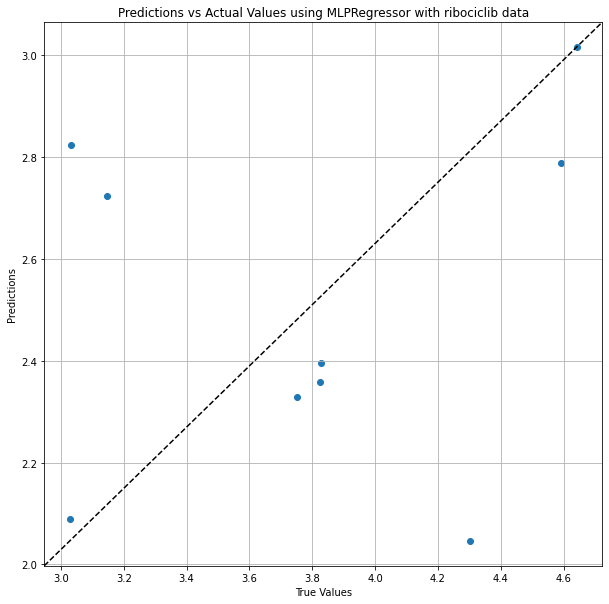

Correlation coefficient: 0.2069, p-value: 0.5932


In [52]:
# plot the predictions vs the actual values

import matplotlib.pyplot as plt

# add in a line of y=x

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls='--', c='k')

# title
plt.title('Predictions vs Actual Values using MLPRegressor with ribociclib data')
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

# pearson correlation coefficient

from scipy.stats import pearsonr

corr, p_val = pearsonr(y_test, predictions)

# print the correlation coefficient and p-value
print(f'Correlation coefficient: {corr:.4f}, p-value: {p_val:.4f}')



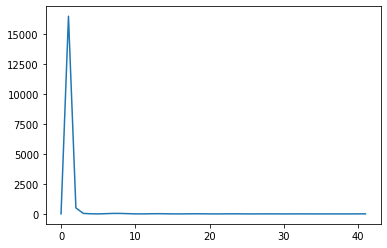

In [41]:
# show loss curve

plt.plot(mlp.loss_curve_)


## Run 7 - Plotting Lasso Correlation

In [47]:
## LOADING DATA

import pickle
import dynmarker.FeatureSelection as fs 

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)

feature_data, label_data = fs.create_feature_and_label(ribociclib_data)

In [48]:
# train test split using MLPRegressor

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.2)

from sklearn.linear_model import Lasso, ElasticNet 

lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

predictions = lasso.predict(X_test)

from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, predictions)

print(score)

2.232926906108912


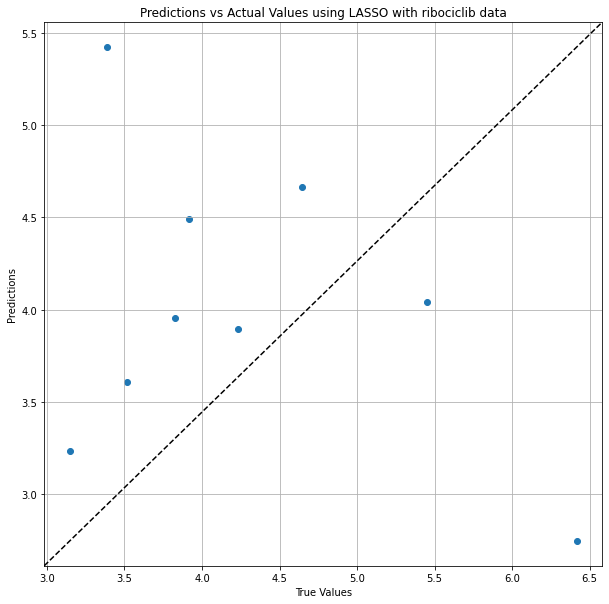

Correlation coefficient: -0.3921, p-value: 0.2966


In [49]:
# plot the predictions vs the actual values

import matplotlib.pyplot as plt

# add in a line of y=x

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls='--', c='k')

# title
plt.title('Predictions vs Actual Values using LASSO with ribociclib data')
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

# pearson correlation coefficient

from scipy.stats import pearsonr

corr, p_val = pearsonr(y_test, predictions)

# print the correlation coefficient and p-value
print(f'Correlation coefficient: {corr:.4f}, p-value: {p_val:.4f}')

